In [49]:
# Plot things in notebook window
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data_frame = pd.DataFrame.from_csv("/home/dan/documents/ccn/anne_2.tsv", sep="\t")

data_frame.info()
data_frame.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 2 to 955
Data columns (total 20 columns):
action         4 non-null object
bonus          1 non-null float64
box_images     1 non-null object
boxes          178 non-null object
condition      1 non-null float64
correct        328 non-null object
goals          328 non-null object
indexOf        3 non-null float64
key_list       2 non-null object
phase          344 non-null object
resp_time      328 non-null float64
response       333 non-null object
reward         328 non-null object
status         10 non-null object
subphase       328 non-null object
template       3 non-null object
templates      1 non-null object
trials_done    2 non-null object
uniqueid       345 non-null object
viewTime       3 non-null float64
dtypes: float64(5), object(15)
memory usage: 156.5+ KB


,action,bonus,box_images,boxes,condition,correct,goals,indexOf,key_list,phase,resp_time,response,reward,status,subphase,template,templates,trials_done,uniqueid,viewTime
2,NaN,NaN,"['/static/images/box2.jpg', '/static/images/bo...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A2WXDAIVLJOCW7:33PPUNGG396OT428N5ETJH58L0DZRX,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goal_survey_pre,NaN,NaN,NaN,begin,NaN,NaN,NaN,NaN,A2WXDAIVLJOCW7:33PPUNGG396OT428N5ETJH58L0DZRX,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goal_survey_pre,NaN,"['goal_survey_pre-input1: 3', 'goal_survey_pre...",NaN,submit,NaN,NaN,NaN,NaN,A2WXDAIVLJOCW7:33PPUNGG396OT428N5ETJH58L0DZRX,NaN


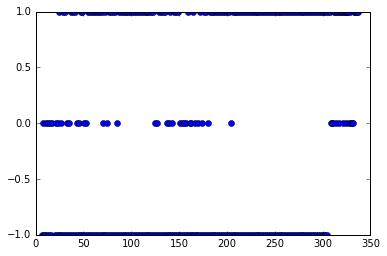

In [50]:
# Extract the column titled 'correct' from the dataframe.
correct_frame  = data_frame['correct'].to_frame()

# Process for easier moving-average computation & plotting
correct_frame.replace('False',0)
correct_frame.replace('True' ,1)

correct_series = correct_frame['correct']

correct_series[correct_series == 'False'] = 0.
correct_series[correct_series == 'True']  = 1.

correct_series = pd.to_numeric(correct_series, errors='coerce').to_frame()
correct_series['index'] = range(0,len(correct_series['correct']))

# Plot the data as is
plt.plot(correct_series['index'],correct_series['correct'],'o')
plt.show()

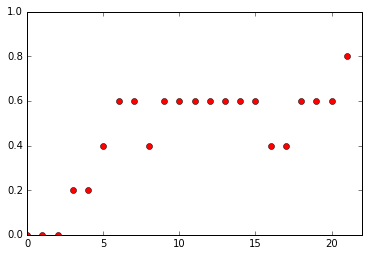

In [51]:
# Drop rows w/ NaNs
mask_nan    = np.isnan(correct_series['correct'])
mask_no_ans = correct_series['correct'] < 0.

correct_series_masked = correct_series['correct'][~(mask_nan | mask_no_ans)] 

# Compute moving average
window_len = 8
max_low_index = math.floor(correct_series_masked.shape[0] /window_len)
average = np.empty([max_low_index, 1])

for low_index in range(0, max_low_index):
    average[low_index] = np.mean( correct_series_masked[low_index : (low_index + 5)] )
    
plt.plot(average,'or')
plt.xlim(0,max_low_index)
plt.ylim(0,1)
plt.show()

In [52]:
test_frame = data_frame[['correct','phase','boxes','response']]
test_frame = test_frame[test_frame['phase'] == 'test']
test_frame.head()

,correct,phase,boxes,response
310,True,test,"['/static/images/box4.jpg', '/static/images/bo...",right
311,False,test,"['/static/images/box1.jpg', '/static/images/bo...",right
312,False,test,"['/static/images/box2.jpg', '/static/images/bo...",right
313,False,test,"['/static/images/box4.jpg', '/static/images/bo...",left
314,True,test,"['/static/images/box2.jpg', '/static/images/bo...",left


In [53]:
right_mask = test_frame['response'] == 'right'
left_mask  = test_frame['response'] == 'left'
none_mask  = test_frame['response'] == 'none'
null_mask  = test_frame['response'].isnull()

response_codes = test_frame['response'][~(none_mask | null_mask)] 

response_codes[right_mask] = 0
response_codes[left_mask ] = 1

test_frame['response_codes'] = response_codes
test_frame.head()

,correct,phase,boxes,response,response_codes
310,True,test,"['/static/images/box4.jpg', '/static/images/bo...",right,0
311,False,test,"['/static/images/box1.jpg', '/static/images/bo...",right,0
312,False,test,"['/static/images/box2.jpg', '/static/images/bo...",right,0
313,False,test,"['/static/images/box4.jpg', '/static/images/bo...",left,1
314,True,test,"['/static/images/box2.jpg', '/static/images/bo...",left,1


In [54]:
import json

result = []
i = 0
for index in response_codes.index:
    i = i + 1
    temp = json.loads(test_frame['boxes'][index].replace('\'','"'))
    print(temp[test_frame['response_codes'][index]].split('/')[-1])


box4.jpg
box1.jpg
box2.jpg
box1.jpg
box3.jpg
box4.jpg
box2.jpg
box4.jpg
box4.jpg
box2.jpg
box1.jpg
box4.jpg
box4.jpg
box1.jpg
box4.jpg
box4.jpg
box2.jpg
box1.jpg
box1.jpg
box4.jpg
box2.jpg
box4.jpg
box2.jpg
box1.jpg
box2.jpg
box4.jpg
box4.jpg
box1.jpg
box1.jpg
box4.jpg


In [59]:
import copy
id_map = {}

dfcopy = copy.copy(data_frame)
for item in data_frame['uniqueid'].unique():
    dfcopy['uniqueid'].replace(item, str(hash(item)), inplace=True)
    print(item, hash(item))

dfcopy.head()

A2WXDAIVLJOCW7:33PPUNGG396OT428N5ETJH58L0DZRX -684336657005543461
nan 0


,action,bonus,box_images,boxes,condition,correct,goals,indexOf,key_list,phase,resp_time,response,reward,status,subphase,template,templates,trials_done,uniqueid,viewTime
2,NaN,NaN,"['/static/images/box2.jpg', '/static/images/bo...",NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-684336657005543461,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goal_survey_pre,NaN,NaN,NaN,begin,NaN,NaN,NaN,NaN,-684336657005543461,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,goal_survey_pre,NaN,"['goal_survey_pre-input1: 3', 'goal_survey_pre...",NaN,submit,NaN,NaN,NaN,NaN,-684336657005543461,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,box_survey_pre,NaN,NaN,NaN,begin,NaN,NaN,NaN,NaN,-684336657005543461,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,box_survey_pre,NaN,"['box_survey_pre-input1: 2', 'box_survey_pre-i...",NaN,submit,NaN,NaN,NaN,NaN,-684336657005543461,NaN


In [70]:
import copy

dfcopy = copy.copy(data_frame)
dfcopy = dfcopy[['bonus', 'uniqueid']]

null_mask = dfcopy['bonus'].isnull()
dfcopy = dfcopy[~null_mask]

print('WorkerID: ', dfcopy['uniqueid'], ' Bonus: ', dfcopy['bonus'])

WorkerID:  345    -684336657005543461
Name: uniqueid, dtype: object  Bonus:  345    4.98
Name: bonus, dtype: float64
